In [43]:
# Importando Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

In [60]:
# 2. Crear el directorio del proyecto (carpeta para guardar análisis)
project_dir = 'results'
if not os.path.exists(project_dir):
    os.makedirs(project_dir)

In [61]:
# Cargar los datos CSV
df = pd.read_csv("olympics_dataset.csv")
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [62]:
# 4. Análisis exploratorio de los datos
print("Primeras filas del dataset:\n", df.head())

Primeras filas del dataset:
    player_id                   Name Sex            Team  NOC  Year  Season  \
0          0              A Dijiang   M           China  CHN  1992  Summer   
1          1               A Lamusi   M           China  CHN  2012  Summer   
2          2            Gunnar Aaby   M         Denmark  DEN  1920  Summer   
3          3            Edgar Aabye   M  Denmark/Sweden  DEN  1900  Summer   
4         26  Cornelia (-strannood)   F     Netherlands  NED  1932  Summer   

          City       Sport                         Event     Medal  
0    Barcelona  Basketball   Basketball Men's Basketball  No medal  
1       London        Judo  Judo Men's Extra-Lightweight  No medal  
2    Antwerpen    Football       Football Men's Football  No medal  
3        Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4  Los Angeles   Athletics  Athletics Women's 100 metres  No medal  


In [63]:
print("Descripción de los datos:\n", df.describe())

Descripción de los datos:
           player_id           Year
count  2.525650e+05  252565.000000
mean   2.305499e+05    1981.743908
std    4.289330e+05      32.596548
min    0.000000e+00    1896.000000
25%    5.713700e+04    1960.000000
50%    1.356110e+05    1988.000000
75%    2.118590e+05    2008.000000
max    9.460001e+06    2024.000000


In [64]:
print("Información de las columnas:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB
Información de las columnas:
 None


In [65]:
# 5. Verificación de valores faltantes
print("Valores faltantes:\n", df.isnull().sum())

Valores faltantes:
 player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


In [66]:
# 6. Preparación de los datos (Limpieza y selección de variables)
# Supongamos que tenemos la columna 'Medal' como objetivo (target) y otras como características
# Vamos a simplificar el análisis enfocándonos en columnas relevantes
data_clean = df.dropna()  # Removemos filas con valores nulos, si aplica

In [67]:
# Identificar columnas categóricas (cualquier columna con tipo de dato 'object')
categorical_columns = data_clean.select_dtypes(include=['object']).columns

In [68]:
# Aplicar LabelEncoder a cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_clean[column] = le.fit_transform(data_clean[column])
    label_encoders[column] = le  # Guardamos los codificadores por si los necesitamos más tarde

## **Aplicación del Algoritmo Decision Trees** ##

In [69]:
# Selección de características (para fines de demostración)
# Definimos las variables independientes y dependientes
X = data_clean.drop('Medal', axis=1)  # Características
y = data_clean['Medal']  # Variable objetivo

In [70]:
# 7. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# 8. Entrenamiento del modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# 9. Predicciones y evaluación del modelo
y_pred = clf.predict(X_test)

In [73]:
# 10. Evaluación de métricas
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 86.98%


In [74]:
# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[ 2007   181  1486   228]
 [  195  2432  1044   252]
 [ 1893  1263 59452  1538]
 [  218   230  1336  2015]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.47      0.51      0.49      3902
           1       0.59      0.62      0.61      3923
           2       0.94      0.93      0.93     64146
           3       0.50      0.53      0.51      3799

    accuracy                           0.87     75770
   macro avg       0.62      0.65      0.64     75770
weighted avg       0.87      0.87      0.87     75770



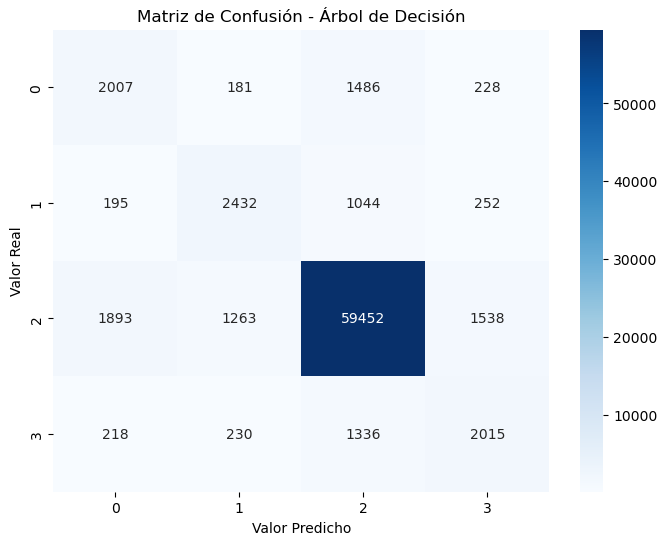

In [76]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho') # Guardamos la matriz de confusión
plt.savefig(os.path.join(project_dir, 'confusion_matrix.png'))  # Guardamos la matriz de confusión
plt.show()

In [77]:
# 11. Guardar resultados en archivos
result_file_path = os.path.join(project_dir, 'decision_tree_analysis_report.txt')
with open(result_file_path, 'w') as f:
    f.write("Precisión del modelo: {:.2f}%\n".format(accuracy * 100))
    f.write("Matriz de Confusión:\n")
    f.write(str(conf_matrix) + "\n")
    f.write("Reporte de Clasificación:\n")
    f.write(classification_report(y_test, y_pred))